# **Task 1 - Data Analysis and Preprocessing**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import logging


In [2]:
# Add the 'scripts' directory to the Python path for module imports
scripts_path = os.path.abspath(os.path.join('..', 'scripts'))
sys.path.append(scripts_path)
print("✅ 'scripts' directory added to the Python path successfully!")

✅ 'scripts' directory added to the Python path successfully!


In [3]:
# Set max rows and columns to display for better visibility in outputs
import pandas as pd

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Log the configuration of display options
logging.info("📏 Maximum rows and columns set for better visibility in outputs.")
print("=======================================")
print("✅ Display options configured successfully!")

✅ Display options configured successfully!


In [4]:
# Configure logging
from logger import LoggerSetup  # Assuming LoggerSetup is defined in scripts/

# Initialize the logger for tracking the data analysis and preprocessing steps
log_file_path = '../logs/data_analysis&preprocessing.log'
logger = LoggerSetup(log_file=log_file_path).get_logger()
print("============================================================================")
print("🔧 Logging system initialized for data analysis and preprocessing.")

2025-02-07 20:13:08,920 - logger - INFO - Logger configured successfully.
INFO:logger:Logger configured successfully.


🔧 Logging system initialized for data analysis and preprocessing.


In [5]:
# Import the DatasetLoader class for loading and preprocessing datasets
from data_loader import DatasetLoader 

In [6]:
# DatasetLoader to load a dataset
fraud_data_path = '../data/Fraud_Data.csv'  
data_loader = DatasetLoader(filepath=fraud_data_path, logger=logger)  

# Load the dataset 
("🔄 Starting to load the dataset...")

fraud_df = data_loader.load_dataset()

# Display the first 10 rows of the dataset
print("================================================================================")
print("               📋 Here are the first 10 rows of the dataset:")
print("================================================================================")
fraud_df.head(10)


2025-02-07 20:13:09,281 - logger - INFO - Dataset loaded successfully.
INFO:logger:Dataset loaded successfully.


               📋 Here are the first 10 rows of the dataset:


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0


In [7]:
# Convert 'signup_time' and 'purchase_time' to datetime format
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'], errors='coerce')
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'], errors='coerce')

# Log the conversion process
logging.info("🔄 Converted 'signup_time' and 'purchase_time' to datetime format.")
print("🔄 Converted 'signup_time' and 'purchase_time' to datetime format.")

# Verify the data types after conversion
print("=======================================")
print("Data Types After Conversion:")
print(fraud_df.dtypes)

🔄 Converted 'signup_time' and 'purchase_time' to datetime format.
Data Types After Conversion:
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object


In [8]:
# Display information about the DataFrame
print("           📊 DataFrame Overview:")
print("==========================================")
fraud_df.info()

print("=======================================")
print("✅ Information displayed successfully.")

           📊 DataFrame Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB
✅ Information displayed successfully.


In [9]:
# Check for missing values in the dataset
missing_values = fraud_df.isnull().sum()

# Attractive output for missing values
print("        🔍 Missing Values in Each Column:")
print("==============================================")
print(missing_values)

# Confirm if there are any missing values
if missing_values.sum() == 0:
    print("===============================================")
    print("✅ No missing values found in the dataset.")
    
else:
    total_missing = missing_values.sum()
    print(f"⚠️ There are {total_missing} missing values in the dataset.")

        🔍 Missing Values in Each Column:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
✅ No missing values found in the dataset.


In [10]:
# Check for duplicate rows in the DataFrame
duplicate_count = fraud_df.duplicated().sum()

# Attractive output for duplicate count
print("🔍 Checking for Duplicate Rows:")
print("=======================================")
print(f"📋 Number of duplicate rows: {duplicate_count}")

# Drop duplicates if any are found
if duplicate_count > 0:
    print("⚠️ Duplicate rows found! Dropping duplicates...")
    fraud_df.drop_duplicates(inplace=True)
    print("✅ Duplicates dropped successfully.")
else:
    print("✅ No duplicate rows found in the dataset.")

🔍 Checking for Duplicate Rows:
📋 Number of duplicate rows: 0
✅ No duplicate rows found in the dataset.


In [11]:
# Summary Statistics of numerical features
summary_statistics = fraud_df.describe(include='number')

# Display the summary statistics
print("          📊 Summary Statistics of Numerical Features:")
print("=================================================================\n")
summary_statistics

          📊 Summary Statistics of Numerical Features:



,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


## **Dataset Overview**

### **Short Summary**

The dataset contains **151,112** records with the following features:

- **user_id:** 
  - Ranges from 2 to 400,000, 
  - Mean: 200,171.04.

- **purchase_value:** 
  - Ranges from 9 to 154, 
  - Mean: 36.94, 
  - Standard Deviation: 18.32.

- **age:** 
  - Ranges from 18 to 76, 
  - Mean: 33.14, 
  - Standard Deviation: 8.62.

- **ip_address:** 
  - Values range significantly, indicating a wide geographical distribution.

- **class:** 
  - Binary variable with a mean of 0.09, suggesting a low prevalence of the positive class.

In [12]:
# Statistical summary of object data features
object_summary_statistics = fraud_df.describe(include='object')

# Display the summary statistics
print("     📋 Statistical Summary of Object Data Features:")
print("============================================================")
object_summary_statistics

     📋 Statistical Summary of Object Data Features:


,device_id,source,browser,sex
count,151112,151112,151112,151112
unique,137956,3,5,2
top,CQTUVBYIWWWBC,SEO,Chrome,M
freq,20,60615,61432,88293


### **Additional Data Features**

The dataset further includes:

- **device_id:** 
  - 137,956 unique values, 
  - Most frequent device ID: CQTUVBYIWWWBC (appears 20 times).

- **source:** 
  - 3 unique sources, 
  - Most common source: SEO (accounting for 60,615 records).

- **browser:** 
  - 5 unique browsers, 
  - Most used: Chrome (appearing in 61,432 records).

- **sex:** 
  - 2 unique categories (M/F), 
  - Predominant category: M (Male), recorded 88,293 times.

### **Exploratory Data Analysis**

**Univariate Analysis**

- **Objective:** Analyze individual features to gain insights into their distributions.

  - **Numerical Features:** 
    - Examine the distributions to understand spread, central tendency, and potential outliers, identifying patterns and trends within the data.

2025-02-07 20:13:09,998 - logger - INFO - Plotting Histograms.
INFO:logger:Plotting Histograms.


Generating histograms for numerical features...


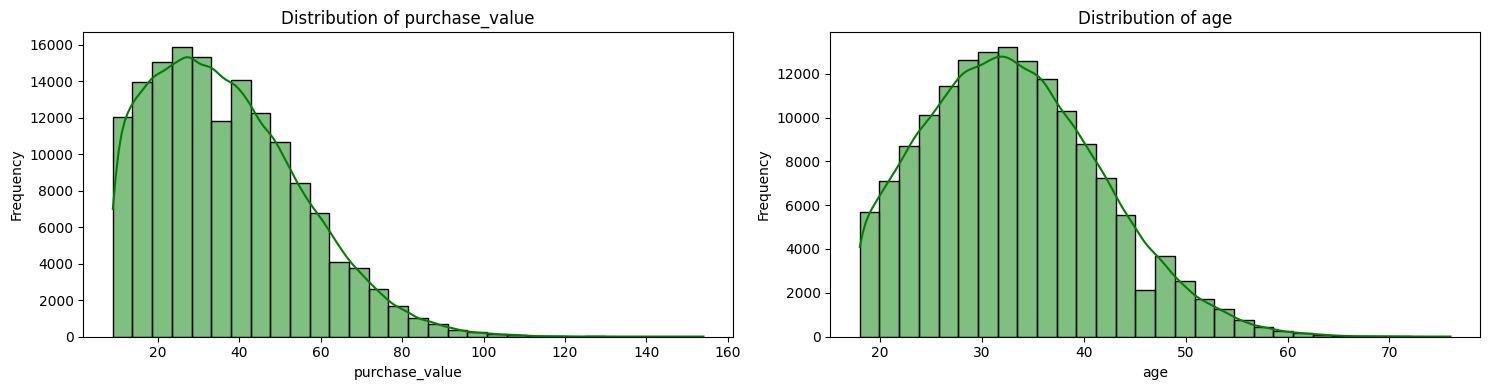

Histograms generated successfully!


In [13]:
# Import the necessary data visualizer tool
from fraud_data_visualizer import FraudDataVisualizer

# Define the numerical features for analysis
numerical_features = ['purchase_value', 'age']

# Define the categorical features for analysis
categorical_features = ['source', 'browser', 'sex']

# Create an instance of the FraudDataVisualizer class
visualizer = FraudDataVisualizer(fraud_df, numerical_features, categorical_features, 'class', logger)

# Print a message indicating that we are starting to plot histograms
print("Generating histograms for numerical features...")

# Plot histograms for the defined numerical features
visualizer.plot_histograms()  

# Print a message indicating that the plotting is complete
print("Histograms generated successfully!")

- **Purchase Value Distribution:** Right-skewed, with most values between 10 and 50.

- **Age Distribution:** Also right-skewed, with most individuals aged between 20 and 40.

- **Skewness:** Both distributions show a decline in frequency as values increase, indicating fewer high-value purchases and older individuals.

### **Distribution of categorical features**

2025-02-07 20:13:11,451 - logger - INFO - Plotting Counts.
INFO:logger:Plotting Counts.


Visualizing the distribution of categorical features...


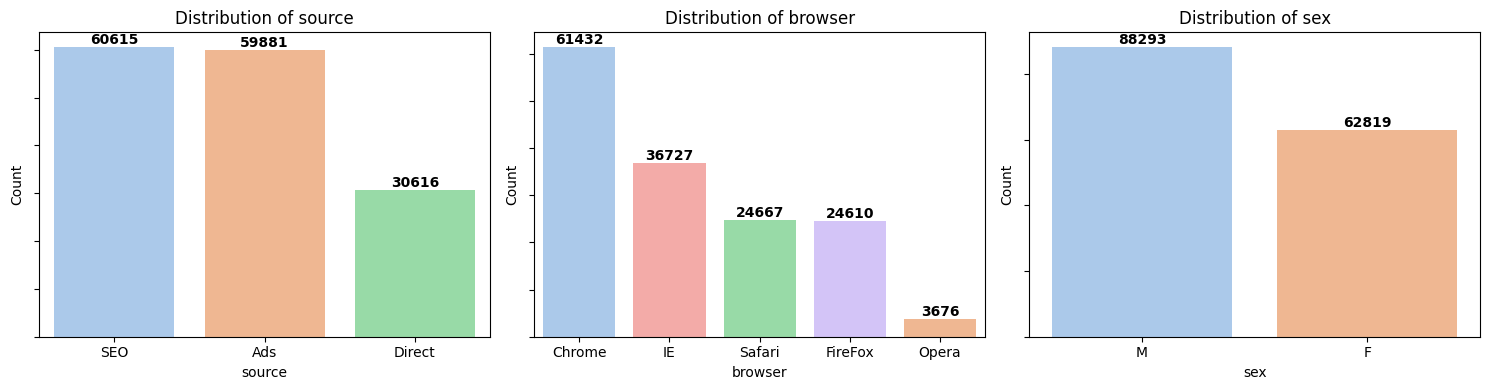

Distribution visualization completed successfully!


In [14]:
# Print a message indicating that we are starting the visualization
print("Visualizing the distribution of categorical features...")

# Visualize the counts of the defined categorical features
visualizer.plot_counts()  

# Print a message indicating that the distribution visualization is complete
print("Distribution visualization completed successfully!")

#### **Summary of Distributions**

+ **Source Distribution**:
  + The distribution of sources reveals that SEO and Ads are nearly equally prevalent, each accounting for approximately 60,000 counts. In contrast, Direct traffic is significantly less common.
+ **Browser Distribution**:
  + Among browsers, Chrome dominates user preference, followed by Internet Explorer (IE). Usage of Safari, Firefox, and Opera is notably lower.
+ **Sex Distribution**:
  + The data indicates a higher frequency of males (M) compared to females (F), with around 88,293 males versus 62,819 females.

**Bivariate Analysis**

- **Objective:** Explore relationships between different features.

  - **Purchase Value vs. Age:** 
    - Analyze how purchase value correlates with age to identify trends and patterns in spending behavior.

2025-02-07 20:13:12,298 - logger - INFO - Plotting purchase_value vs age scatter plot.
INFO:logger:Plotting purchase_value vs age scatter plot.


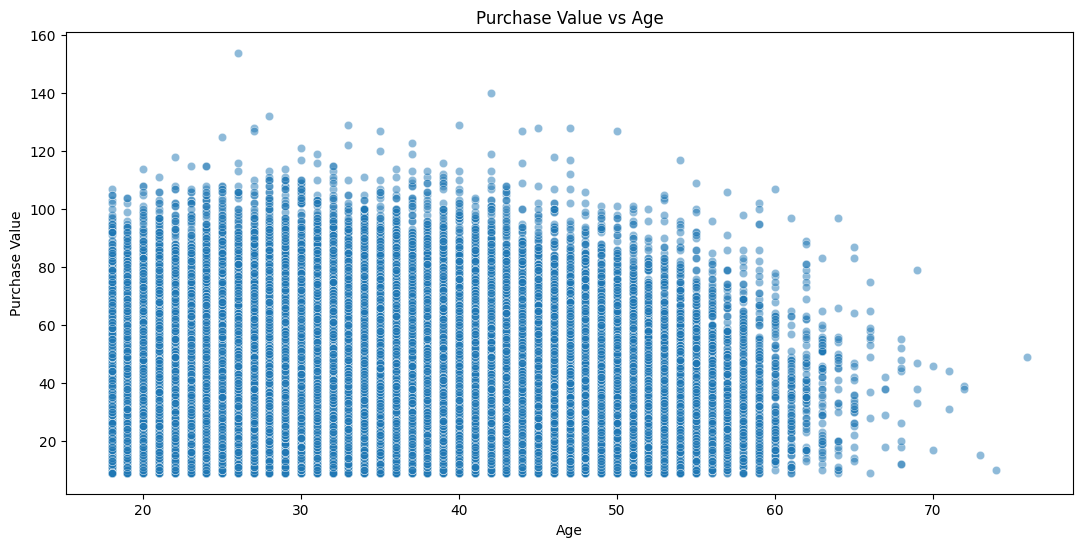

2025-02-07 20:13:12,700 - logger - INFO - Successfully plotted purchase_value vs age scatter plot.
INFO:logger:Successfully plotted purchase_value vs age scatter plot.


Relationship plot completed successfully!


In [15]:
# Plot the relationship between purchase_value and age
visualizer.plot_relationship()

# Print a message indicating that the plotting is complete
print("Relationship plot completed successfully!")

- **Relationship:** The scatter plot shows purchase value against age.

- **Pattern:** Purchase values are fairly consistent across ages 20 to 50, with values spread between 20 and 140.

- **Decline:** For ages above 50, purchase values gradually decrease, indicating fewer high-value purchases among older individuals.

2025-02-07 20:13:12,711 - logger - INFO - Plotting box plot.
INFO:logger:Plotting box plot.


Creating boxplot for purchase value by sex...


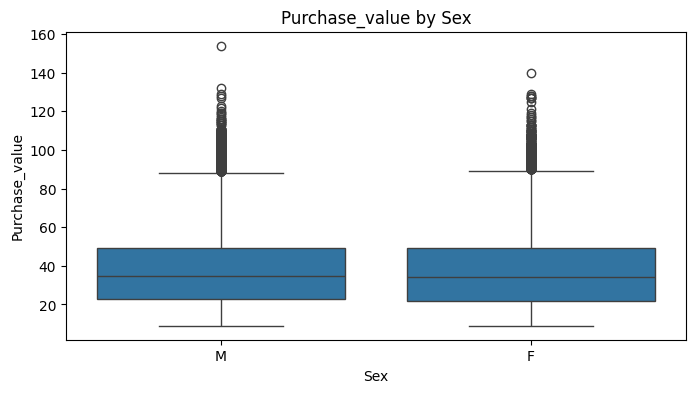

Boxplot visualization completed successfully!


In [16]:
print("Creating boxplot for purchase value by sex...")

# Boxplot for purchase_value by sex
visualizer.plot_boxplot('sex', 'purchase_value')

# Print a message indicating the completion of the boxplot visualization
print("Boxplot visualization completed successfully!")

- **Relationship:** The box plot compares purchase values between two sexes: male (M) and female (F).

- **Pattern:** The median purchase value is similar for both males and females. However, the distribution of purchase values differs:

    - **Males:** The distribution is slightly wider, with a few outliers indicating higher purchase values.
    
    - **Females:** The distribution is more concentrated around the median, with fewer outliers, suggesting a more consistent spending pattern.

2025-02-07 20:13:12,956 - logger - INFO - Plotting box plot.
INFO:logger:Plotting box plot.


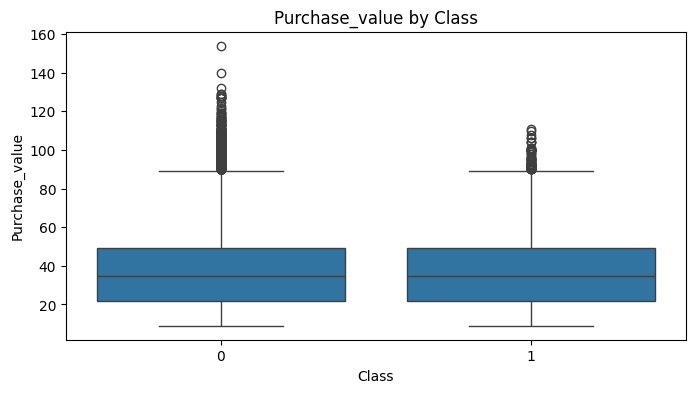

In [17]:
visualizer.plot_boxplot('class', 'purchase_value')

**Pattern:**
- **Non-Fraud(0):** Wider distribution with a few outliers indicating higher purchase values

- **Fraud(1):** More concentrated distribution around the median, with fewer outliers, suggesting consistent spending.

**Conclusion:** The median purchase values are similar, but class 0 shows a broader range of spending, with some individuals making significantly higher purchases than those in class 1.

Generating pairwise relationship plots...


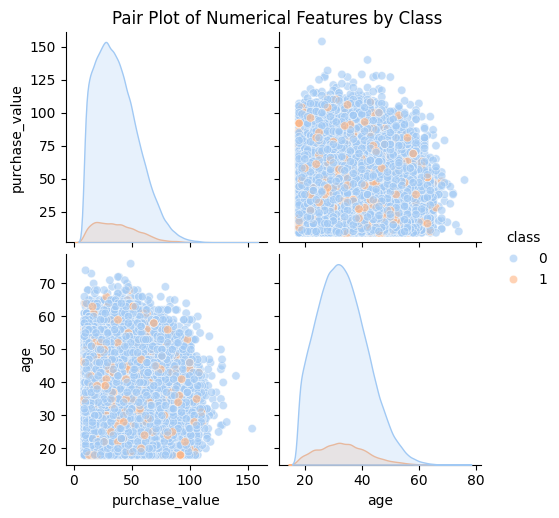

Pairwise relationship visualization completed successfully!


In [18]:
print("Generating pairwise relationship plots...")

# Pairwise relationship
visualizer.plot_pairwise_relationships()

# Print a message indicating that the visualization is complete
print("Pairwise relationship visualization completed successfully!")

The pair plot illustrates the relationships between the numerical features (purchase_value and age) and the target variable (class).

**Key Insights**:

+ There is significant overlap in the purchase value distributions between classes 0 (Non-Fraud) and 1 (Fraud), indicating that purchase value alone may not be a reliable predictor of class.
+ The substantial overlap in age distributions for classes 0 (Non-Fraud) and 1 (Fraud) suggests that age may also be an ineffective predictor of class.

**Conclusion**:

The scatter plot reveals a weak positive correlation, indicating that older individuals tend to make slightly higher purchases on average. However, this relationship is not particularly strong, suggesting that additional factors may influence purchase behavior.

2025-02-07 20:13:34,333 - logger - INFO - Plotting categorical variables distributions by class.
INFO:logger:Plotting categorical variables distributions by class.


Plotting the distribution of categorical feature variables by target variable...


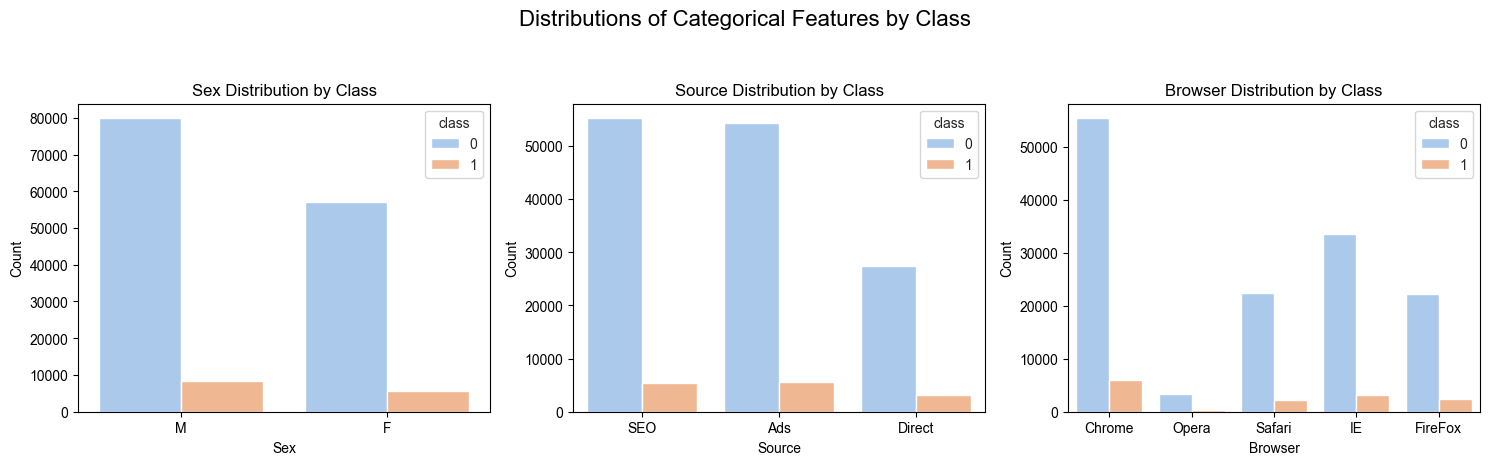

2025-02-07 20:13:35,853 - logger - INFO - Successfully plotted multiple distributions by class.
INFO:logger:Successfully plotted multiple distributions by class.


Distribution visualization completed successfully!


In [19]:
print("Plotting the distribution of categorical feature variables by target variable...")

# Plot the distribution of categorical feature variables by target variable
visualizer.plot_distribution_by_class()

# Print a message indicating that the visualization is complete
print("Distribution visualization completed successfully!")

The plots reveal differences in the distributions of categorical features (Sex, Source, Browser) between the two classes.

**Key Insights**

**Sex Distribution**
- **Class 0**: Higher proportion of males (M) compared to females (F).
- **Class 1**: More balanced distribution, with a slight majority of females.

**Source Distribution**
- **Class 0**: Predominantly from organic search (SEO), followed by paid advertising (Ads).
- **Class 1**: More balanced across sources, with a slight preference for direct traffic.

**Browser Distribution**
- **Class 0**: Popular browsers include Chrome, IE, and Safari.
- **Class 1**: More concentrated usage of Chrome, with fewer users on Opera and Safari.

**Conclusion**
- **Sex**: May be moderately informative; the distribution differences suggest it could aid in predicting the target variable.
- **Source**: Likely less informative; high overlap in distributions indicates it may not be a strong predictor.
- **Browser**: Could be a potentially informative feature; differences in usage suggest a relationship with class that might be explored further.

Plotting browser usage and purchase value distribution by target variable...


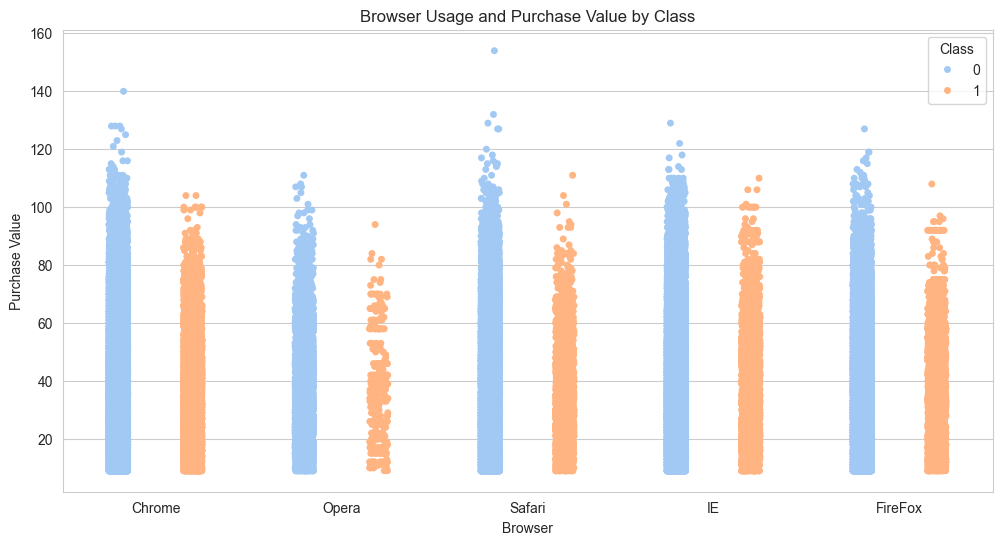

Browser usage and purchase value visualization completed successfully!


In [20]:
print("Plotting browser usage and purchase value distribution by target variable...")

# Plot browser usage and purchase value distribution
visualizer.plot_browser_usage()

# Print a message indicating that the visualization is complete
print("Browser usage and purchase value visualization completed successfully!")


+ **Browser Overlap**: Most browsers (Chrome, Opera, Safari, IE) exhibit significant overlap in purchase values between non-fraud (Class 0) and fraud (Class 1) users. This suggests that browser usage alone is not a strong predictor of fraudulent behavior.

+ **Distinct Separation**: Firefox users show a clear separation, with non-fraud users (Class 0) consistently having higher purchase values. This indicates that Firefox could be a moderately informative feature for identifying fraudulent activity.

2025-02-07 20:13:38,809 - logger - INFO - Plotting source vs browser heatmap.
INFO:logger:Plotting source vs browser heatmap.


Generating heatmap for cross-tabulation of source and browser...


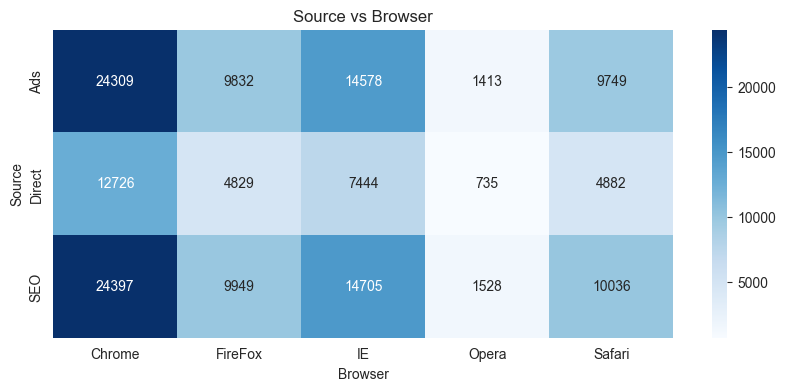

2025-02-07 20:13:39,014 - logger - INFO - Successfully plotted source vs browser heatmap.
INFO:logger:Successfully plotted source vs browser heatmap.


Heatmap visualization for source and browser completed successfully!


In [21]:
print("Generating heatmap for cross-tabulation of source and browser...")

# Plot the heatmap for source vs. browser
visualizer.plot_source_vs_browser_heatmap()

# Print a message indicating that the visualization is complete
print("Heatmap visualization for source and browser completed successfully!")

- **Chrome** is the most popular browser across all sources.

- **SEO** is the dominant traffic source for most browsers.

- **Ads** and **Direct traffic** are more common for Chrome and IE, while Firefox, Opera, and Safari rely mainly on SEO.

In [22]:
print("Generating sunburst chart for source, browser, and class hierarchy...")

# Plot the sunburst chart
visualizer.plot_sunburst_chart()

# Print a message indicating that the visualization is complete
print("Sunburst chart visualization completed successfully!")

Generating sunburst chart for source, browser, and class hierarchy...


Sunburst chart visualization completed successfully!


2025-02-07 20:13:40,433 - logger - INFO - Plotting the distribution of purchase delays.
INFO:logger:Plotting the distribution of purchase delays.


Generating purchase delay distribution plot...


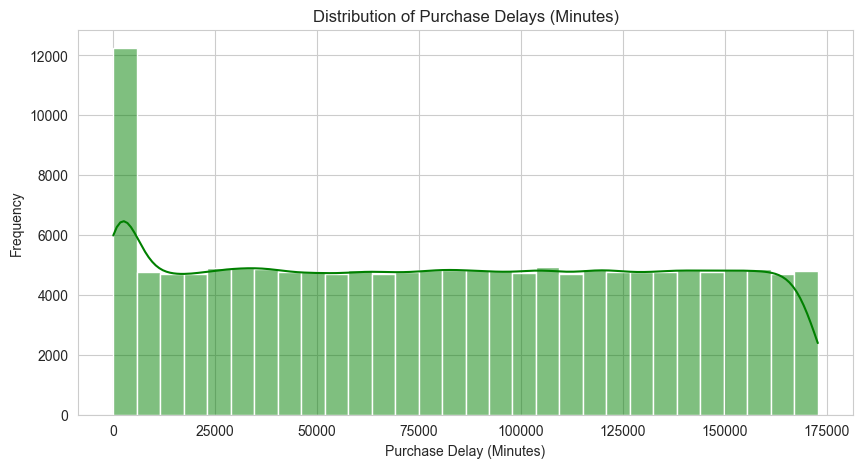

2025-02-07 20:13:41,218 - logger - INFO - Successfully plotted the distribution of purchase delays.
INFO:logger:Successfully plotted the distribution of purchase delays.


Purchase delay distribution visualization completed successfully!


In [23]:
print("Generating purchase delay distribution plot...")

# Plot the purchase delay distribution
visualizer.plot_purchase_delay_distribution()

# Print a message indicating that the visualization is complete
print("Purchase delay distribution visualization completed successfully!")

2025-02-07 20:13:41,232 - logger - INFO - Plotting purchase patterns over time.
INFO:logger:Plotting purchase patterns over time.


Generating purchase patterns over time plot...


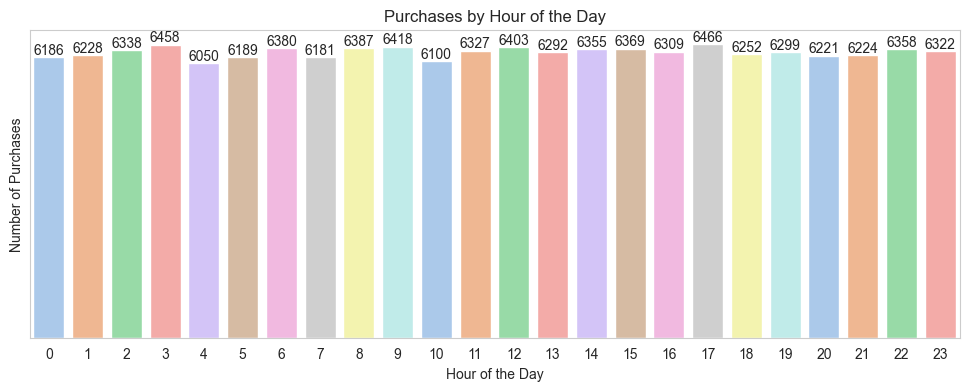

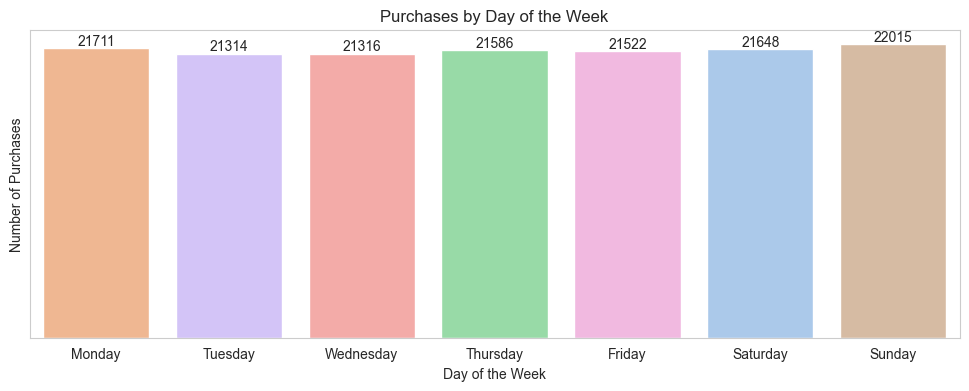

2025-02-07 20:13:42,543 - logger - INFO - Successfully plotted purchase patterns over time.
INFO:logger:Successfully plotted purchase patterns over time.


Purchase patterns over time visualization completed successfully!


In [24]:
print("Generating purchase patterns over time plot...")

# Plot the purchase patterns over time
visualizer.plot_purchase_patterns_over_time()

# Print a message indicating that the visualization is complete
print("Purchase patterns over time visualization completed successfully!")

2025-02-07 20:13:42,559 - logger - INFO - Plotting the relationship between purchase value and purchase delay.
INFO:logger:Plotting the relationship between purchase value and purchase delay.


Generating purchase value vs. delay plot...


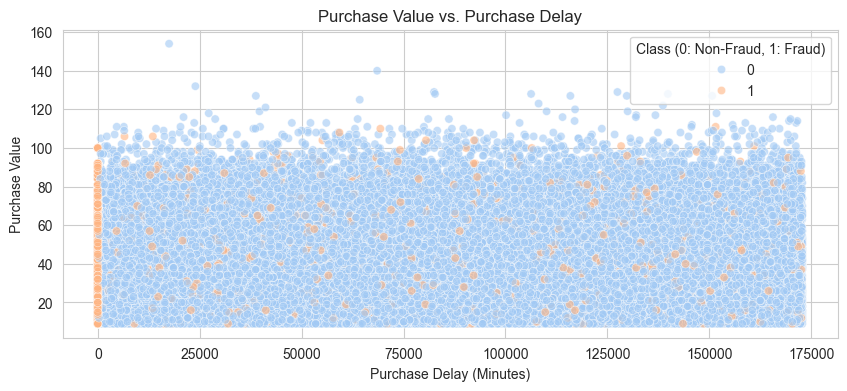

2025-02-07 20:13:50,085 - logger - INFO - Successfully plotted purchase value vs. delay.
INFO:logger:Successfully plotted purchase value vs. delay.


Purchase value vs. delay visualization completed successfully!


In [25]:
print("Generating purchase value vs. delay plot...")

# Plot the purchase value vs. delay
visualizer.plot_purchase_value_vs_delay()

# Print a message indicating that the visualization is complete
print("Purchase value vs. delay visualization completed successfully!")

### **Purchase Analysis Summary**

**Key Insights**

**Purchase Delays**
- Most purchases are completed within a short timeframe, with delays predominantly under 25,000 minutes.
- A notable number of purchases experience long delays, as indicated by the distribution's long tail.

**Hourly Purchase Patterns**
- Purchase counts are fairly consistent across all hours of the day, indicating steady activity without significant peaks.
- Slight increases in some hours suggest stable customer purchasing behavior.
- **Implication**: Marketing strategies could be effectively spread throughout the day rather than concentrated at specific times.

**Weekly Purchase Trends**
- Purchase volumes across the days of the week are relatively similar, with slightly higher counts on Monday and Sunday, possibly linked to weekend shopping or the start of the workweek.

**Purchase Value vs. Delay**
- Purchase value and delay do not reliably predict fraud.
- Additional features, such as transaction history or customer information, are necessary for accurate classification.
- Outliers may indicate fraudulent activity; further investigation into these outliers could reveal patterns associated with fraud.

### **Load IpAddress_to_Country**

In [26]:
# DatasetLoader to load a dataset
ip_address_country_data_path = '../data/IpAddress_to_Country.csv'  
data_loader = DatasetLoader(filepath=ip_address_country_data_path, logger=logger)  

# Load the dataset 
("🔄 Starting to load the dataset...")

ip_address_country_df = data_loader.load_dataset()

# Display the first 10 rows of the dataset
print("================================================================================")
print("               📋 Here are the first 10 rows of the dataset:")
print("================================================================================")
ip_address_country_df.head(10)


2025-02-07 20:13:50,163 - logger - INFO - Dataset loaded successfully.
INFO:logger:Dataset loaded successfully.


               📋 Here are the first 10 rows of the dataset:


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China
5,16781312.0,16785407,Japan
6,16785408.0,16793599,China
7,16793600.0,16809983,Japan
8,16809984.0,16842751,Thailand
9,16842752.0,16843007,China


In [27]:
# Display information about the DataFrame
print("           📊 DataFrame Overview:")
print("==========================================")
ip_address_country_df.info()

print("=======================================")
print("✅ Information displayed successfully.")

           📊 DataFrame Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB
✅ Information displayed successfully.


In [28]:
# Check for missing values in the dataset
missing_values = ip_address_country_df.isnull().sum()

# Attractive output for missing values
print("        🔍 Missing Values in Each Column:")
print("==============================================")
print(missing_values)

# Confirm if there are any missing values
if missing_values.sum() == 0:
    print("===============================================")
    print("✅ No missing values found in the dataset.")
    
else:
    total_missing = missing_values.sum()
    print(f"⚠️ There are {total_missing} missing values in the dataset.")

        🔍 Missing Values in Each Column:
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64
✅ No missing values found in the dataset.


In [29]:
# Check for duplicate rows in the DataFrame
duplicate_count = ip_address_country_df.duplicated().sum()

# Attractive output for duplicate count
print("🔍 Checking for Duplicate Rows:")
print("=======================================")
print(f"📋 Number of duplicate rows: {duplicate_count}")

# Drop duplicates if any are found
if duplicate_count > 0:
    print("⚠️ Duplicate rows found! Dropping duplicates...")
    ip_address_country_df.drop_duplicates(inplace=True)
    print("✅ Duplicates dropped successfully.")
else:
    print("✅ No duplicate rows found in the dataset.")

🔍 Checking for Duplicate Rows:
📋 Number of duplicate rows: 0
✅ No duplicate rows found in the dataset.


In [30]:
# Summary Statistics of numerical features
summary_statistics = ip_address_country_df.describe(include='number')

# Display the summary statistics
print("          📊 Summary Statistics of Numerical Features:")
print("=================================================================\n")
summary_statistics

          📊 Summary Statistics of Numerical Features:



,lower_bound_ip_address,upper_bound_ip_address
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


In [31]:
# Statistical summary of object data features
object_summary_statistics = ip_address_country_df.describe(include='object')

# Display the summary statistics
print("     📋 Statistical Summary of Object Data Features:")
print("============================================================")
object_summary_statistics

     📋 Statistical Summary of Object Data Features:


,country
count,138846
unique,235
top,United States
freq,46868


### **IP Fraud Analysis**

In [32]:
from fraud_ip_analysis import FraudIPAnalyzer

In [33]:
# Load your fraud dataset
fraud_df = pd.read_csv('../data/Fraud_Data.csv')

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Initialize the FraudIPAnalyzer
analyzer = FraudIPAnalyzer(fraud_df, '../data/IpAddress_to_Country.csv')

In [34]:
# Run analysis
merged_data = analyzer.process_data()

In [35]:
# Display the first few rows
merged_data.head(10)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_int,country
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,1.677886e+07,0,16778864,Australia
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,1.684205e+07,0,16842045,Thailand
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,1.684366e+07,0,16843656,China
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,1.693873e+07,0,16938732,China
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,1.697198e+07,0,16971984,Thailand
639,23204,2015-06-15 21:47:39,2015-08-02 04:35:34,25,CSFNDSDBQATBA,Ads,IE,F,43,1.699555e+07,0,16995546,China
640,155230,2015-03-15 08:27:21,2015-05-21 13:55:15,37,BRDZLYDRFATRF,Ads,Chrome,F,46,1.709773e+07,0,17097732,Thailand
641,199369,2015-01-17 14:38:23,2015-03-15 18:13:39,43,MURSXNWVBRZVM,Direct,IE,M,37,1.712443e+07,0,17124428,Japan
642,236894,2015-06-16 04:02:41,2015-07-25 01:29:33,22,YXWLWLZBQVBMG,Ads,Chrome,M,31,1.713459e+07,0,17134590,Japan
643,379446,2015-04-11 13:13:27,2015-07-03 22:27:10,49,FAWCZLEWWUDVD,SEO,Chrome,M,24,1.716216e+07,0,17162159,Japan


In [36]:
merged_data['class'].value_counts()

class
0    116878
1     12268
Name: count, dtype: int64

<Figure size 1600x700 with 0 Axes>

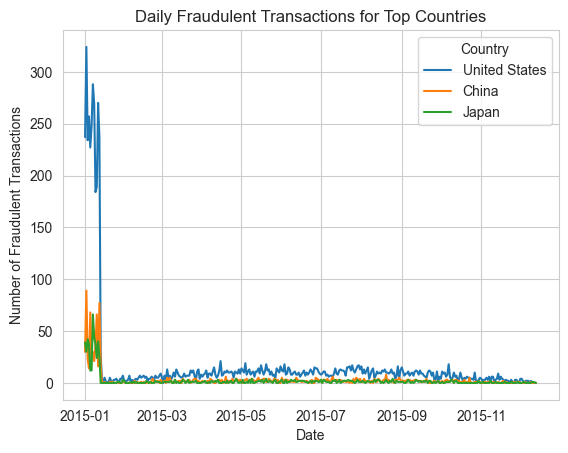

In [37]:
# Convert 'purchase_time' to datetime format
merged_data['purchase_time'] = pd.to_datetime(merged_data['purchase_time'])

# Group fraudulent transactions by day and country
daily_fraud = merged_data[merged_data['class'] == 1].groupby([merged_data['purchase_time'].dt.date, 'country']).size().unstack().fillna(0)

# Determine the top three countries with the highest number of fraudulent transactions
top_countries = daily_fraud.sum().nlargest(3).index

# Plotting fraud trends over time for the top countries
plt.figure(figsize=(16, 7))
daily_fraud[top_countries].plot()
plt.title('Daily Fraudulent Transactions for Top Countries')
plt.xlabel('Date')
plt.ylabel('Number of Fraudulent Transactions')
plt.legend(title='Country')
plt.show()

In [38]:
# Save the first 10 rows of merged_data to a CSV file
merged_data.to_csv('../data/merged_fraud_data.csv', index=False)

print("Saved as 'merged_fraud_data.csv'")

Saved as 'merged_fraud_data.csv'


### **Feature Engineering**

In [47]:
# Import the class
from feature_engineering import FeatureEngineering

# Initialize the FeatureEngineering class
print("Initializing FeatureEngineering with the provided DataFrame...")
feature_engineering = FeatureEngineering(merged_data, logger)

Initializing FeatureEngineering with the provided DataFrame...


In [48]:
# Run the data processing pipeline
print("Starting the data processing pipeline...")
feature_engineering.pipeline()
print("Data processing complete!")

Starting the data processing pipeline...
Data processing complete!


In [49]:
# Retrieve and display the processed DataFrame
print("Retrieving the processed DataFrame...")
processed_data = feature_engineering.get_processed_data()
print("Displaying the first few rows of the processed data:")
display(processed_data.head())

Retrieving the processed DataFrame...
Displaying the first few rows of the processed data:


,purchase_value,age,class,fraud_rate,hour_of_day,day_of_week,purchase_delay,user_transaction_frequency,device_transaction_frequency,user_transaction_velocity,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
user_id,,,,,,,,,,,,,,,,,
247547,0.549607,-0.363124,0,-0.233869,-1.231124,1.487911,-0.413800,0.0,-0.259874,-0.232945,0.0,1.0,0.0,0.0,0.0,1.0,0.0
220737,-1.197335,0.101168,0,-1.259767,1.229002,-0.505034,-1.180852,0.0,-0.259874,-0.232943,0.0,1.0,0.0,0.0,0.0,0.0,0.0
390400,0.385831,-0.479197,0,-0.354204,1.663142,0.989675,-0.936126,0.0,0.116936,-0.232944,0.0,0.0,0.0,1.0,0.0,0.0,1.0
69592,0.986342,-0.363124,0,-0.354204,0.650149,0.989675,0.867086,0.0,-0.259874,-0.232946,1.0,0.0,0.0,0.0,0.0,0.0,0.0
174987,0.767974,0.449387,0,-1.259767,-1.086411,-1.003270,1.700633,0.0,-0.259874,-0.232946,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [51]:
output_file_path = '../data/processed_fraud_data.csv'
print(f"Saving the processed data to {output_file_path}...")
processed_data.to_csv(output_file_path, index=False)
print("✅ Data saved successfully!")

Saving the processed data to ../data/processed_fraud_data.csv...
✅ Data saved successfully!
